In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import numpy as np
import GenerateData as gd
import gmsh
import GenerateGraph as gg

In [13]:
!dolfin-convert data/mesh/DDrandom_0.msh data/mesh/DDrandom_0.xml
!dolfin-convert data/mesh/DDrandom_1.msh data/mesh/DDrandom_1.xml
!dolfin-convert data/mesh/DDrandom_2.msh data/mesh/DDrandom_2.xml
!dolfin-convert data/mesh/DDrandom_3.msh data/mesh/DDrandom_3.xml
!dolfin-convert data/mesh/DDrandom_4.msh data/mesh/DDrandom_4.xml
!dolfin-convert data/mesh/DDrandom_5.msh data/mesh/DDrandom_5.xml
!dolfin-convert data/mesh/DDrandom_6.msh data/mesh/DDrandom_6.xml
!dolfin-convert data/mesh/DDrandom_7.msh data/mesh/DDrandom_7.xml
!dolfin-convert data/mesh/DDrandom_8.msh data/mesh/DDrandom_8.xml
!dolfin-convert data/mesh/DDrandom_9.msh data/mesh/DDrandom_9.xml
!dolfin-convert data/mesh/DDrandom_10.msh data/mesh/DDrandom_10.xml
!dolfin-convert data/mesh/DDrandom_11.msh data/mesh/DDrandom_11.xml
!dolfin-convert data/mesh/DDrandom_12.msh data/mesh/DDrandom_12.xml
!dolfin-convert data/mesh/DDrandom_13.msh data/mesh/DDrandom_13.xml
!dolfin-convert data/mesh/DDrandom_14.msh data/mesh/DDrandom_14.xml
!dolfin-convert data/mesh/DDrandom_15.msh data/mesh/DDrandom_15.xml
!dolfin-convert data/mesh/DDrandom_16.msh data/mesh/DDrandom_16.xml
!dolfin-convert data/mesh/DDrandom_17.msh data/mesh/DDrandom_17.xml
!dolfin-convert data/mesh/DDrandom_18.msh data/mesh/DDrandom_18.xml
!dolfin-convert data/mesh/DDrandom_19.msh data/mesh/DDrandom_19.xml

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 228 vertices
Found all vertices
Expecting 395 cells
Found all cells
Conversion done
Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 152 vertices
Found all vertices
Expecting 243 cells
Found all cells
Conversion done
Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 192 vertices
Found all vertices
Expecting 327 cells
Found all cells
Conversion done
Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 190 vertices
Found all vertices
Expecting 318 cells
Found all cells
Conversion done
Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 191 vertices
Found all vertices
Expecting 322 cells
Found all cells
Conversion done
Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 213 vertices
Found all vertices
Expecting 371 cells
Found all cells
Conversion done
Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML fo

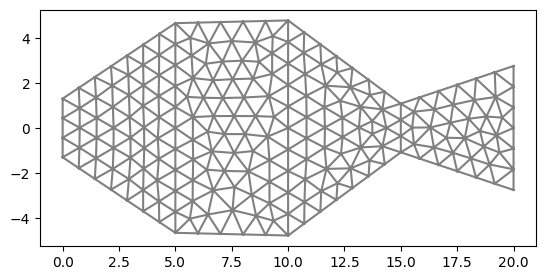

In [3]:
mesh_load = gd.MeshLoader("data/mesh/DDrandom")
mesh = mesh_load.mesh
bounds = mesh_load.bounds
face = mesh_load.face
plot(mesh)

In [15]:
idx = np.where(mesh.coordinates()[:,1] < 3)[0]#and mesh.coordinates()[:,1].any() > 2 )[0]
idx2 = np.where(mesh.coordinates()[:,1] > 2)[0]
idx

array([  0,   1,   2,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  19,  20,  21,  22,  23,  24,  25,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  69,  70,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 120,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 148, 149,
       150, 151, 152, 153, 154, 156, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 20

In [16]:
elementi_comuni = np.intersect1d(idx, idx2)

# Stampa gli elementi comuni
print(elementi_comuni)

[  9  19  20  37  38  47  48  61  70  85 100 105 115 122 123 124 125 149
 151 159 161 168 187 189]


In [17]:
tags = {'walls':[5],'inlet':[6],'outlet':[7], 'interface': [8,9,10], 'faces': [11,12,13,14]}
mesh_load.update_tags(tags)
mesh_load.measure_definition()

(Measure('interior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 99292), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f3c311a5ab0>),
 Measure('exterior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 99292), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f3c311a5ab0>),
 Measure('cell', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 99292), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f3c349661b0>))

Calling FFC just-in-time (JIT) compiler, this may take some time.


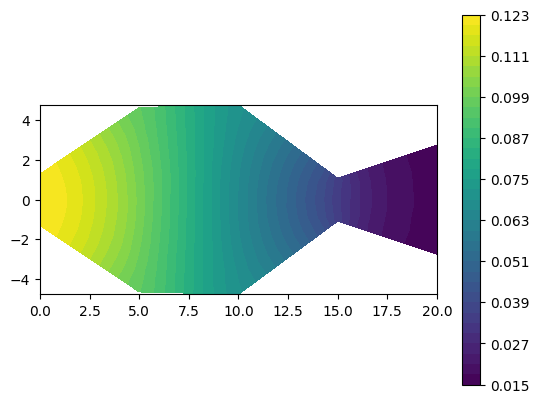

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.


Graph(num_nodes=5, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(2,), dtype=torch.float32), 'k': Scheme(shape=(1, 1), dtype=torch.float32), 'NodeId': Scheme(shape=(), dtype=torch.float32), 'inlet_mask': Scheme(shape=(), dtype=torch.float32), 'outlet_mask': Scheme(shape=(), dtype=torch.float32), 'interface_length': Scheme(shape=(1, 1), dtype=torch.float32), 'flux': Scheme(shape=(1, 50), dtype=torch.float32), 'dt': Scheme(shape=(1, 1), dtype=torch.float32), 'T': Scheme(shape=(1, 1), dtype=torch.float32)}
      edata_schemes={'EdgeId': Scheme(shape=(), dtype=torch.float32), 'area': Scheme(shape=(1, 1), dtype=torch.float32), 'length': Scheme(shape=(1, 1), dtype=torch.float32)})

In [18]:
set_log_active(False)
V = FunctionSpace(mesh_load.mesh,"DG",1)
k = 10
f = Constant(0.0)
u0 = Expression('0.0',degree=0)
# f = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1]-2.5, 2))',degree=2, a=0.2)
# u0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1]-2.5, 2))',degree=2, a=0.01)

T = 5
timesteps = 50
dt = T/ timesteps

def gaussian(t,a,b,c):
    return a*np.exp(-(t-b)**2/c**2)

time = np.linspace(0,T,timesteps)
g = Expression('a*exp(-(t-b)*(t-b)/c/c)',degree=2,a=2,b=2.5,c=1,t=0)

heat_gaussian = gd.Heat(mesh_load,'Heat',V,k,f,u0,dt,T,g,doplot=True)
heat_gaussian.solve()
heat_gaussian.plot_solution()
data = gd.DataHeat(heat_gaussian,mesh_load)
data.save_graph(output_dir = "data/graphs_test/")

In [4]:
# #diffusion of a gaussian function
np.random.seed(50)
tags = {'walls':[5],'inlet':[6],'outlet':[7], 'interface': [8,9,10], 'faces': [11,12,13,14]}
for i in range(300):
    it = np.random.randint(0,20)
    mesh_load = gd.MeshLoader(f"data/mesh/DDrandom_{it}")
    mesh = mesh_load.mesh
    bounds = mesh_load.bounds
    face = mesh_load.face
    mesh_load.update_tags(tags)
    mesh_load.measure_definition()
    set_log_active(False)
    k = round(np.random.uniform(1, 100),2)
    V = FunctionSpace(mesh_load.mesh,"DG",1)
    f = Constant(0.0)
    g = Expression('a*exp(-(t-b)*(t-b)/c/c)',degree=2,a=2,b=2.5,c=1,t=0)
    u0 = Expression('0.0',degree=0)
    T = 5
    timesteps = 50
    dt = T/ timesteps

    heat_gaussian = gd.Heat(mesh_load,'Heat', V,k,f,u0,dt,T,g)
    heat_gaussian.solve()
    #heat_gaussian.plot_solution()
    data = gd.DataHeat(heat_gaussian,mesh_load)
    data.save_graph(output_dir = "data/graphs_rm2/")


Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved to disk.
Graph saved t

In [7]:
import os
import json
import re

# Specify the directory containing .grph files
# input_directory = os.path.expanduser("~/Documents/pacs/pacsproj/data/graphs_rm2/")
input_directory = os.path.expanduser("data/graphs_rm2/")

# Get the full path
input_directory = os.path.realpath(input_directory)

# Initialize an empty dictionary to store JSON objects for each file
json_dict = {}

# Iterate through each .grph file in the directory
for graph_file in os.listdir(input_directory):
    if graph_file.endswith(".grph"):
        # Extract the filename without extension
        filename_no_extension = os.path.splitext(graph_file)[0]

        # Extract the mu parameter from the filename (assuming it is in the format k_11.3.grph)
        mu_match = re.search(r'_(\d+(\.\d+)?)', filename_no_extension)
        mu = mu_match.group(1) if mu_match else None

        # Create a dictionary for each .grph file
        json_dict[filename_no_extension] = {
            "model_type": "heat_eq",
            "T": 0.937,
            "dt": 0.000937,
            "time_shift": 0,
            "bc_type": "RCR",
            "mu": mu
        }

# Save the dictionary as a JSON file
json_file_path = os.path.join(input_directory, "dataset_info.json")
with open(json_file_path, 'w') as json_file:
    json.dump(json_dict, json_file, indent=2)

print(f"Created {json_file_path}")


Created /mnt/c/Users/ASUS/Desktop/POLI/PACS/pacsproj/data/graphs_rm2/dataset_info.json


In [20]:
import dgl

bo = dgl.data.utils.load_graphs(f"data/graphs_test/k_{10}.grph")
bo[0][0].ndata['interface_length']

tensor([[[2.6000]],

        [[9.3000]],

        [[9.5400]],

        [[2.1600]],

        [[5.5000]]])